## Xlwings

#### Editing with xl wings

In [32]:
import pandas as pd
import numpy as np

In [33]:
data = pd.DataFrame(data=np.random.rand(4,4)*100000,
index=["Q1","Q2","Q3","Q4"],
columns=["East","West","North","South"])
data.index.name = "Quaters"
data.columns.name = "Region"
data

Region,East,West,North,South
Quaters,,,,
Q1,51086.631135,71035.336577,99006.251511,87856.877975
Q2,10204.703297,9636.077414,17844.013061,24640.026482
Q3,78782.060485,26833.876968,35783.952001,94365.960300
Q4,5443.132065,366.006642,46841.922815,30633.361383


In [34]:
import xlwings as xw

template = xw.Book()
app = xw.apps.active
sheet = template.sheets["Sheet1"]
sheet["A1"].value = "Import data with Xlwings"
sheet["A1"].api.Font.Bold = True
sheet["A1"].api.Font.ColorIndex = 3
sheet["A1"].api.Font.Italic = True

sheet["A2"].color = (153,196,211)
sheet["A2"].value = "test"

sheet["B3"].value = data
sheet.range("B3:F7").api.Borders(1).LineStyle = 1
sheet.range("B3:F7").api.Borders(2).LineStyle = 1
sheet.range("B3:F7").api.Borders(3).LineStyle = 1
sheet.range("B3:F7").api.Borders(4).LineStyle = 1

sheet.range("B3:F7").expand().columns.autofit()

#template.save("export\\sample_xlwings.xlsx")
#template.close()
#app.kill()

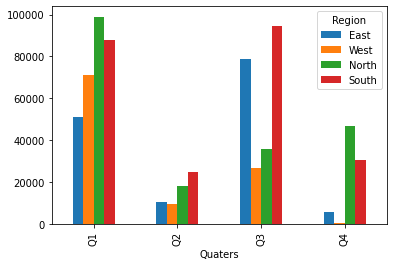

In [35]:
import matplotlib.pyplot as plt
fig = data.plot.bar().get_figure()

In [36]:
plot = sheet.pictures.add(fig,top=sheet["B9"].top,left=sheet["B9"].left)
plot.width,plot.height = plot.width*0.8 , plot.height*0.8

template.save("export\\sample_xlwings_plot.xlsx")
template.close()
app.kill()

In [37]:
path = os.getcwd()
path = path+"\\data\\sample_template.xlsx"

template = xw.Book(path)
app = xw.apps.active
sheet = template.sheets["Sheet1"]

In [38]:
sheet["B3"].value = data
sheet["B3"].expand().columns.autofit()
plot = sheet.pictures.add(fig, name="SalesPlot",
                           top=sheet["B9"].top,
                           left=sheet["B9"].left)
# Let's scale the plot to 70%
plot.width, plot.height = plot.width * 0.7, plot.height * 0.7

In [39]:
template.save("export\\sample_template_edit.xlsx")
template.close()
app.kill()

In [40]:
template = xw.Book(path)
template.sheets.add()
app = xw.apps.active
sheet = template.sheets["Sheet1"]
sheet2 = template.sheets["Sheet2"] # add new sheet
template.close()
app.kill()

Example 1 : export data to template

In [41]:
path = os.getcwd()
path = path + '\\data\\sales_data'
file_extension = '.xlsx'

xlxs_file_list = []
for root,dirs,files in os.walk(path):
    for name in files: 
        if name.endswith(file_extension):
            file_path = os.path.join(root,name)
            xlxs_file_list.append(file_path)
print(xlxs_file_list)

['d:\\My Documents\\Desktop\\New folder\\basic_python_pandas\\data\\sales_data\\2021\\April.xlsx', 'd:\\My Documents\\Desktop\\New folder\\basic_python_pandas\\data\\sales_data\\2021\\August.xlsx', 'd:\\My Documents\\Desktop\\New folder\\basic_python_pandas\\data\\sales_data\\2021\\December.xlsx', 'd:\\My Documents\\Desktop\\New folder\\basic_python_pandas\\data\\sales_data\\2021\\February.xlsx', 'd:\\My Documents\\Desktop\\New folder\\basic_python_pandas\\data\\sales_data\\2021\\January.xlsx', 'd:\\My Documents\\Desktop\\New folder\\basic_python_pandas\\data\\sales_data\\2021\\July.xlsx', 'd:\\My Documents\\Desktop\\New folder\\basic_python_pandas\\data\\sales_data\\2021\\June.xlsx', 'd:\\My Documents\\Desktop\\New folder\\basic_python_pandas\\data\\sales_data\\2021\\March.xlsx', 'd:\\My Documents\\Desktop\\New folder\\basic_python_pandas\\data\\sales_data\\2021\\May.xlsx', 'd:\\My Documents\\Desktop\\New folder\\basic_python_pandas\\data\\sales_data\\2021\\November.xlsx', 'd:\\My Doc

In [42]:
dfs = []

for f in xlxs_file_list:
    #print(f)
    df = pd.read_excel(f)
    df["year"] = f.split("\\")[-2]
    dfs.append(df)

In [43]:
#df = [pd.read_excel(f) for f in xlxs_file_list]
#df

In [44]:
#df = pd.concat(df)
#df

In [45]:
dfs = pd.concat(dfs)
dfs

,transaction_id,store,status,transaction_date,plan,contract_type,amount,year
0,7fb801a5,Chicago,ACTIVE,2019-04-01,Silver,NEW,14.25,2021
1,8e8bdb2a,San Francisco,ACTIVE,2019-04-01,Silver,NEW,14.25,2021
2,239db9b6,Washington DC,ACTIVE,2019-04-01,Silver,NEW,14.25,2021
3,7ccb13ab,San Francisco,ACTIVE,2019-04-01,Gold,NEW,19.35,2021
4,c18e82d9,Chicago,ACTIVE,2019-04-01,Bronze,NEW,12.20,2021
...,...,...,...,...,...,...,...,...
7347,53a449b0,New York,ACTIVE,2019-09-30,Silver,NEW,14.25,2022
7348,35b46c26,Boston,ACTIVE,2019-09-30,Silver,NEW,14.25,2022
7349,9e498c85,Chicago,ACTIVE,2019-09-30,Silver,NEW,14.25,2022
7350,5841d16e,San Francisco,ACTIVE,2019-09-30,Silver,NEW,14.25,2022


In [46]:
dfs.nunique()

transaction_id      93583
store                   6
status                  1
transaction_date      261
plan                    3
contract_type           1
amount                  3
year                    2
dtype: int64

In [47]:
dfs["year"].unique()

array(['2021', '2022'], dtype=object)

In [48]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 187166 entries, 0 to 7351
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    187166 non-null  object        
 1   store             187166 non-null  object        
 2   status            187166 non-null  object        
 3   transaction_date  187166 non-null  datetime64[ns]
 4   plan              187166 non-null  object        
 5   contract_type     187166 non-null  object        
 6   amount            187166 non-null  float64       
 7   year              187166 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 12.9+ MB


In [49]:
dfs.describe()

,amount
count,187166.000000
mean,14.649552
std,2.507038
min,12.200000
25%,12.200000
50%,14.250000
75%,14.250000
max,19.350000


In [50]:
dfs.isna().sum()

transaction_id      0
store               0
status              0
transaction_date    0
plan                0
contract_type       0
amount              0
year                0
dtype: int64

In [51]:
dfs.head()

,transaction_id,store,status,transaction_date,plan,contract_type,amount,year
0,7fb801a5,Chicago,ACTIVE,2019-04-01,Silver,NEW,14.25,2021
1,8e8bdb2a,San Francisco,ACTIVE,2019-04-01,Silver,NEW,14.25,2021
2,239db9b6,Washington DC,ACTIVE,2019-04-01,Silver,NEW,14.25,2021
3,7ccb13ab,San Francisco,ACTIVE,2019-04-01,Gold,NEW,19.35,2021
4,c18e82d9,Chicago,ACTIVE,2019-04-01,Bronze,NEW,12.20,2021


In [52]:
dfs.tail()

,transaction_id,store,status,transaction_date,plan,contract_type,amount,year
7347,53a449b0,New York,ACTIVE,2019-09-30,Silver,NEW,14.25,2022
7348,35b46c26,Boston,ACTIVE,2019-09-30,Silver,NEW,14.25,2022
7349,9e498c85,Chicago,ACTIVE,2019-09-30,Silver,NEW,14.25,2022
7350,5841d16e,San Francisco,ACTIVE,2019-09-30,Silver,NEW,14.25,2022
7351,86937799,Chicago,ACTIVE,2019-09-30,Gold,NEW,19.35,2022


In [64]:
select_year = '2022' #2022 , 2021
dfs_year = dfs[dfs["year"]==select_year]
dfs_year

,transaction_id,store,status,transaction_date,plan,contract_type,amount,year
0,7fb801a5,Chicago,ACTIVE,2019-04-01,Silver,NEW,14.25,2022
1,8e8bdb2a,San Francisco,ACTIVE,2019-04-01,Silver,NEW,14.25,2022
2,239db9b6,Washington DC,ACTIVE,2019-04-01,Silver,NEW,14.25,2022
3,7ccb13ab,San Francisco,ACTIVE,2019-04-01,Gold,NEW,19.35,2022
4,c18e82d9,Chicago,ACTIVE,2019-04-01,Bronze,NEW,12.20,2022
...,...,...,...,...,...,...,...,...
7347,53a449b0,New York,ACTIVE,2019-09-30,Silver,NEW,14.25,2022
7348,35b46c26,Boston,ACTIVE,2019-09-30,Silver,NEW,14.25,2022
7349,9e498c85,Chicago,ACTIVE,2019-09-30,Silver,NEW,14.25,2022
7350,5841d16e,San Francisco,ACTIVE,2019-09-30,Silver,NEW,14.25,2022


In [65]:
pivot = pd.pivot_table(dfs_year,index="transaction_date",columns="store",values="amount",aggfunc="sum")
pivot

store,Boston,Chicago,Las Vegas,New York,San Francisco,Washington DC
transaction_date,,,,,,
2019-01-01,465.15,1277.25,269.70,1740.25,1739.20,355.15
2019-01-02,621.80,1177.50,369.45,1833.85,1861.45,326.70
2019-01-03,449.85,1204.95,302.25,1614.05,1736.20,286.95
2019-01-04,600.45,1165.25,340.95,1712.95,1763.75,204.55
2019-01-07,599.40,1197.80,395.90,1427.70,1967.20,265.65
...,...,...,...,...,...,...
2019-12-25,499.75,894.55,282.95,1480.95,1575.40,224.85
2019-12-26,382.65,971.85,298.25,1260.90,1427.75,193.35
2019-12-27,525.20,821.30,262.55,1429.75,1758.45,209.60


In [66]:
summary = pivot.resample("M").sum()
summary.index.name = "Month"
summary

store,Boston,Chicago,Las Vegas,New York,San Francisco,Washington DC
Month,,,,,,
2019-01-31,13701.10,26272.65,7216.45,42128.25,42969.25,6515.40
2019-02-28,12243.85,24739.90,6192.60,37926.55,36469.35,6705.70
2019-03-31,11026.60,22131.00,5637.25,32805.60,33876.45,5173.80
2019-04-30,10344.80,21489.35,5540.40,32954.35,33265.00,5480.30
2019-05-31,10533.15,20606.55,5266.45,32348.55,31836.80,5293.95
2019-06-30,13317.90,24328.15,5713.55,38543.65,37787.30,5926.05
2019-07-31,10701.65,20877.90,5376.65,31547.60,31386.65,4982.55
2019-08-31,12239.70,24662.75,6335.05,36491.60,36895.10,6729.15
2019-09-30,10757.10,20964.35,5928.55,33226.20,31709.80,5544.45


In [63]:
path = os.getcwd()
path = path+"\\data\\sales_report_template.xlsx"

template = xw.Book(path)
app = xw.apps.active
sheet = template.sheets["Sheet1"]
sheet["B3"].value = summary
template.save("export\\sales_report_with_template.xlsx")
template.close()
app.kill()